**Autoregressive integrated moving average model** 

**1.1 Autoregressive model (AR)**

In statistics, econometrics and signal processing, an autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. [1]

It can be considered as generalization of regular ordinary least squire (OLS) regression:

$Y = C+b_1X_1 + \epsilon$

where:

$C$ is the intercept;

$\epsilon$ - error term $\epsilon\in{\mathcal{N(0,\sigma^2)}}$.

If $X_t$ is dependent on its lag1 - $X_{t-1}$ then OLS will be:

$X_t = C + b_1X_{t-1}+\epsilon_t$

where:

$\epsilon_t$ is normal white noise;

${b_1}\in{(-1,1)}$

Let's consider $p$-order for AR(p) model:

$$X_t = \alpha X_{t-1}+\alpha X_{t-2}+\dots+\alpha_p X_{t-p}+W_t$$

where:

$X_t$ - stationary process;

$\alpha_1,\alpha_2,\dots,\alpha_p = const$;

$W_t$ - normal white noise.


**1.2 Moving-average model (MA)**

Moving-average process is a common approach for modeling univariate time series. The moving-average model specifies that the output variable is cross-correlated with a non-identical to itself random-variable. [2]

MA(q), where $q$ - order can be written:

$$ W_{t} = W_{t} + \theta_{1} W_{t-1} + \theta_{2} W_{t-2} + \cdots + \theta_{q} W_{t-q} $$

Where: 

$\theta_{1}, \theta_{2}, \cdots, \theta_{q}$ are parameters;

$W_{t}$ is white noise: $W_{t}\in{\mathcal{N(0,1)}}$.


**1.3 Autoregressive moving-average model (ARMA)**

ARMA model combines autoregressive and moving-average models to model stationary data:

$$ X_{t} = \alpha_{1} X_{t-1} + \cdots + \alpha_{p} X_{t-p} + W_{t} + \theta_{1} W_{t-1} + \cdots + \theta_{q} W_{t-q} $$

Where:

$\alpha_{p} \neq 0$ and $\theta_{q} \neq 0$;

$W$ is a normal white noise:  $W_{t}\in{\mathcal{N(0,\sigma^2)}}$;

$p$ - autoregressive order, $q$ - moving-average order.

We can see from the above model, if $q = 0$, then ARMA($p, 0$) is an AR($p$) model. If $p = 0$, then ARMA($0, q$) is an MA($q$) model. 


**1.4  Autoregressive integrated moving average model (ARIMA)**

ARIMA differs from ARMA only by differentiating method which allows to use non-stationary data as input:

$$ \nabla^{d} X_{t} = \alpha_{1} \nabla^{d} X_{t-1} + \alpha_{2} \nabla^{d} X_{t-2} + \cdots + \alpha_{p} \nabla^{d} X_{t-p} + \theta_{1} W_{t-1} + \theta_{2} W_{t-2} + \cdots + \theta_{q} W_{t-q} + W_{t} $$

Where: 

$\nabla^{d}$ is Del operator: $\nabla^{d} X_{t} = \sum_{i=1}^{n} (\frac{\partial X_{t}}{\partial x_i})^{d}$

Reference:
1. “Autoregressive Model.” Wikipedia, Wikimedia Foundation, 18 Dec. 2022, https://en.wikipedia.org/wiki/Autoregressive_model. 
2. “Moving-Average Model.” Wikipedia, Wikimedia Foundation, 25 Nov. 2022, https://en.wikipedia.org/wiki/Moving-average_model. 



**Technical memos**

Below one can find a forecast on Consumer Price Index (CPI) for all urban consumers. The data was collected from VectorStock.com and distributed by U.S. Bureau of Labor Statistics. In order to find the best fit of the ARIMA model to CPI data, I used Box-Jenkins method [1] and left my comments on each step of the protocol (see cells below the prediction figure).

Box-Jenkins method consists of the following steps:

1. identification
2. estimation
3. diagnostics

Reference:

1. Box, G. E. P., & Jenkins, G. M. (1976). Time series analysis: Forecasting and control. San Francisco: Holden-Day. 

**Prediction of the final ARIMA model**

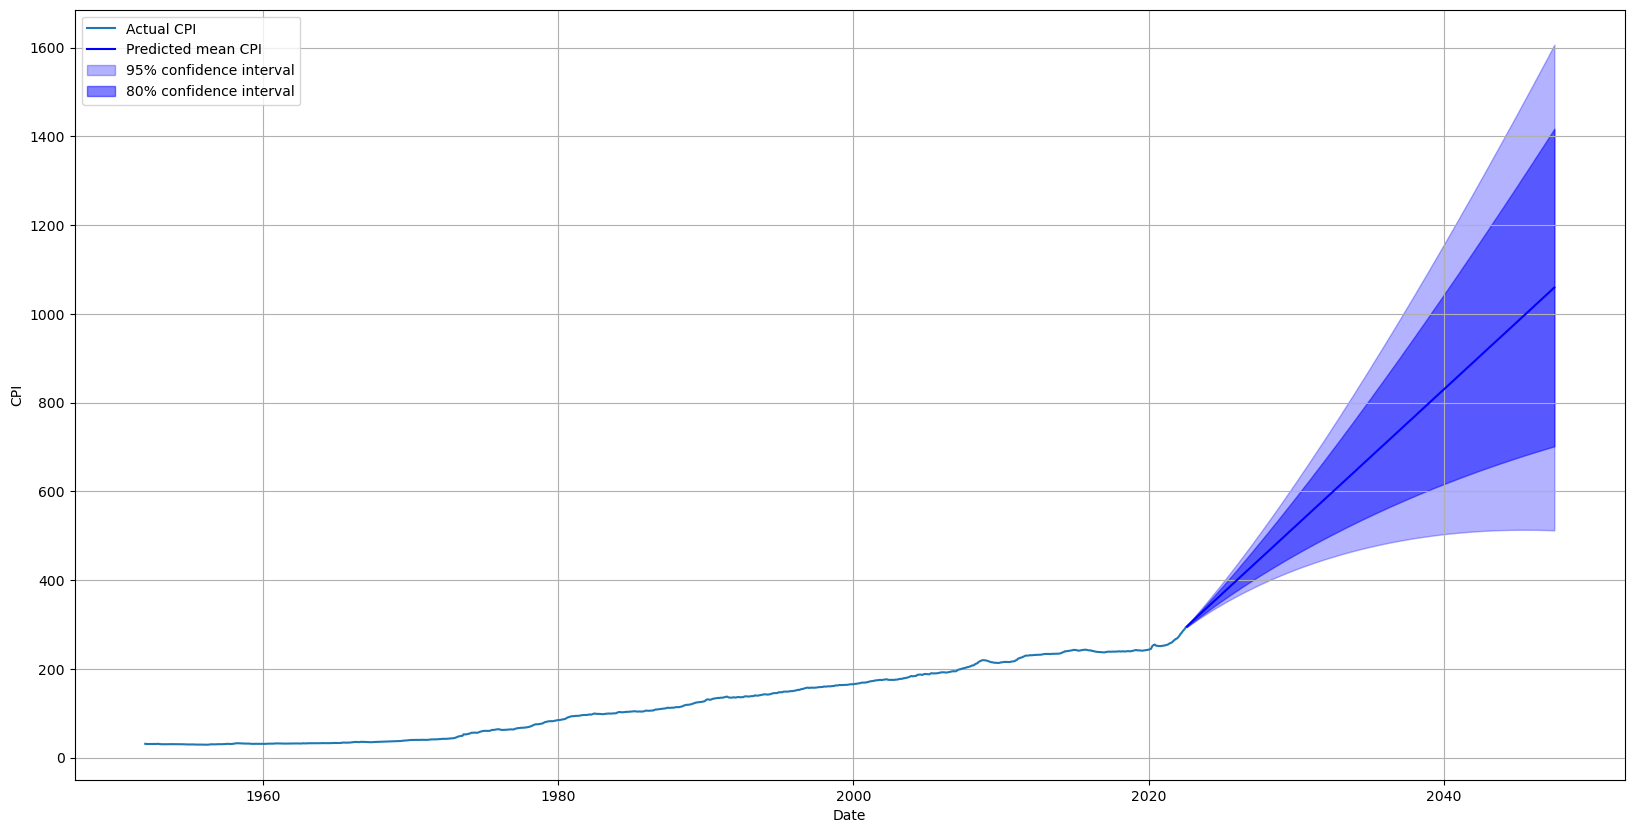

In [21]:
plt.rcParams['figure.figsize'] = (20,10)

df.reset_index(inplace= True)
plt.plot(df['DATE'], df['CPI'], label = 'Actual CPI')

forecast = ARIMA_CPI.get_forecast(steps=300)
forecast_mean = pd.DataFrame(forecast.predicted_mean).reset_index()
forecast_mean.columns = ['DATE','CPI']
conf_int95 = forecast.conf_int(alpha=0.05).reset_index()
conf_int95.columns = ["DATE","lower CPI","upper CPI"]
conf_int80 = forecast.conf_int(alpha=0.2).reset_index()
conf_int80.columns = ["DATE","lower CPI","upper CPI"]

plt.plot(forecast_mean['DATE'], forecast_mean['CPI'], c="b", label = 'Predicted mean CPI')
plt.fill_between(
    conf_int95["DATE"],
    conf_int95["lower CPI"],
    conf_int95["upper CPI"],
    color="b",
    alpha=0.3,
    label = '95% confidence interval'
)
plt.fill_between(
    conf_int80["DATE"],
    conf_int80["lower CPI"],
    conf_int80["upper CPI"],
    color="b",
    alpha=0.5,
    label = '80% confidence interval'
)
plt.xlabel('Date')
plt.ylabel('CPI')

plt.grid()
plt.legend (loc = 'upper left')
plt.show()

In [1]:
! pip install pmdarima
! pip install statsmodels

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('C:\\Users\zokt\Desktop\CPI_Urban_US_City_avg.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace = True)

**Model identification**

Let's check autocorrelation

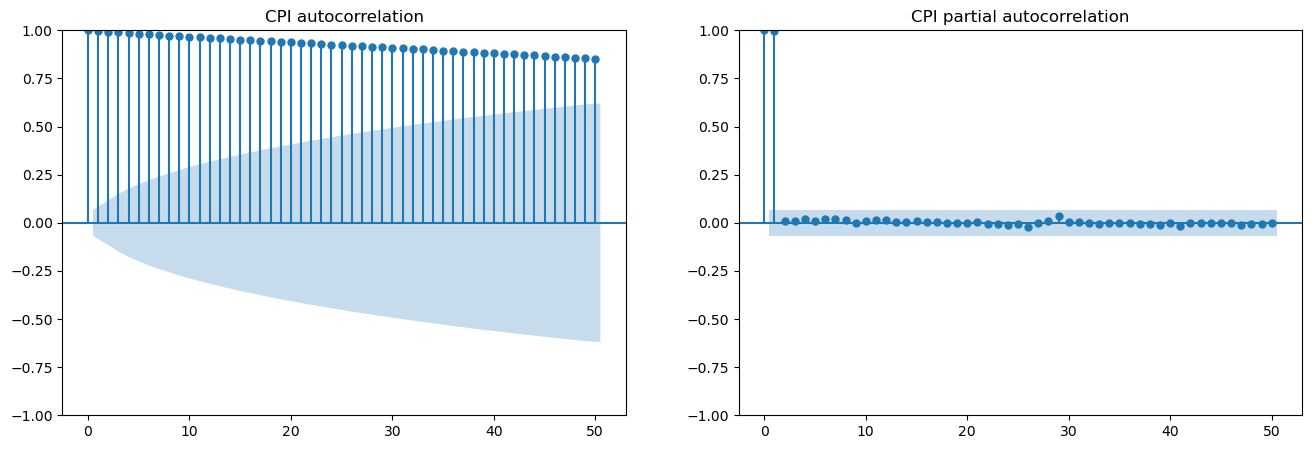

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(df, title="CPI autocorrelation", lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(df, title="CPI partial autocorrelation", lags=50, ax=ax2)
plt.show()

Recent variance of CPI is not constant

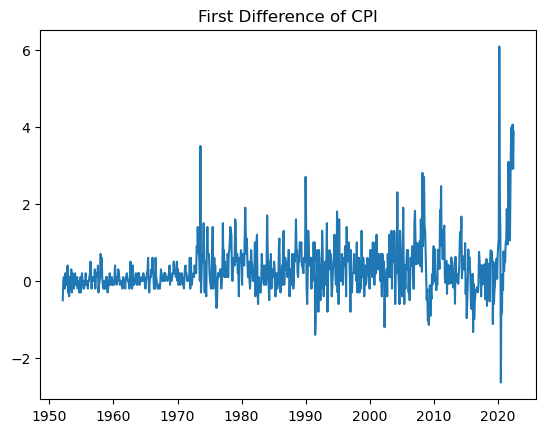

In [10]:
plt.plot(df.diff().dropna())
plt.title("First Difference of CPI")
plt.show()

Variance is more stable after log transformation

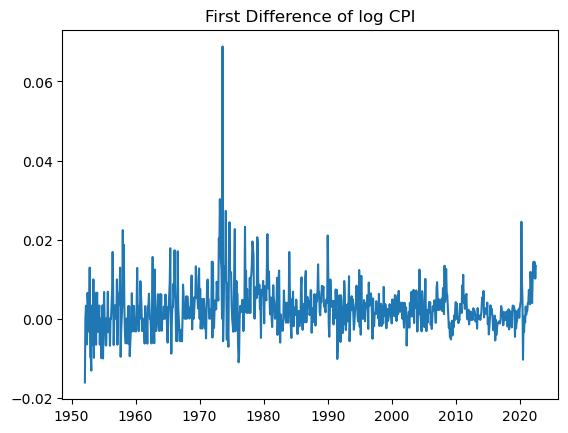

In [11]:
FD_log = np.log(df).diff().dropna()

plt.plot(FD_log)
plt.title("First Difference of log CPI")
plt.show()

Let's check autocorrelation for first difference (FD) of log CPI

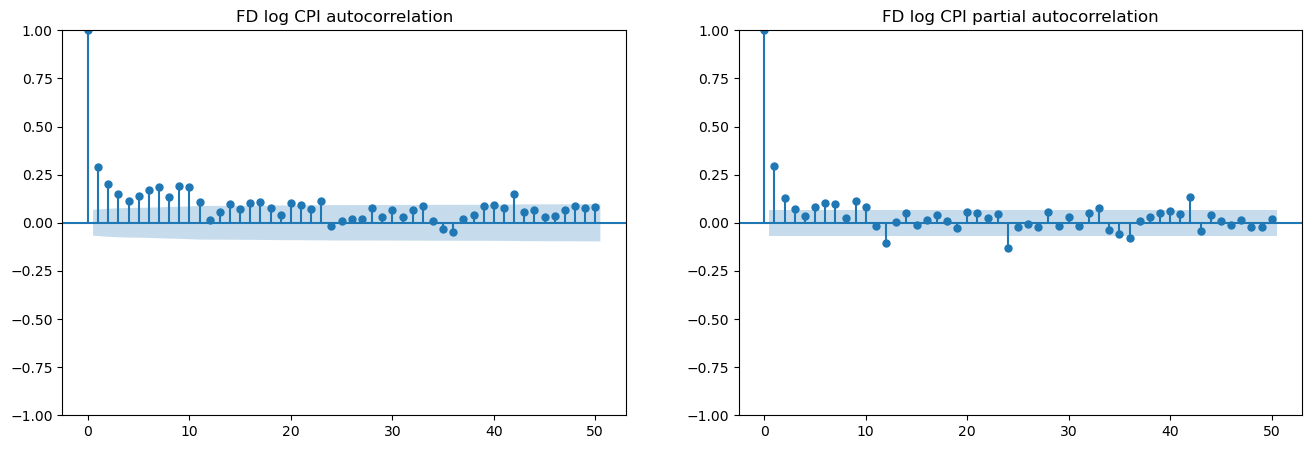

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sm.graphics.tsa.plot_acf(FD_log, title="FD log CPI autocorrelation", lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(FD_log, title="FD log CPI partial autocorrelation", lags=50, ax=ax2)
plt.show()

**Model estimation**

Automatic model selection for log transformed data

In [13]:
df_transformed = np.log(df).dropna()

mod_can_auto = auto_arima(
    df_transformed, 
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=2,
    max_d=2,
    max_q=2,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-5971.098, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-6146.102, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-6348.903, Time=0.25 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-6362.314, Time=0.53 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-6362.110, Time=0.65 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-6325.803, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-6339.728, Time=0.22 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-6207.324, Time=0.28 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-6343.057, Time=0.62 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-6293.282, Time=0.55 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 3.529 seconds


**Let's  apply the best model parameters**

In [14]:
ARIMA_CPI = ARIMA(df, order=(0, 2, 1), trend="n").fit()
ARIMA_CPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                  847
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -733.779
Date:                Sun, 18 Dec 2022   AIC                           1471.557
Time:                        22:24:15   BIC                           1481.036
Sample:                    01-01-1952   HQIC                          1475.189
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7397      0.014    -51.248      0.000      -0.768      -0.711
sigma2         0.3322      0.006     59.933      0.000       0.321       0.343
===================================================================================
Ljung-Box (L1) (Q):                   9.05   Jarque-Bera (JB):              7946.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.08   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Model diagnostics**

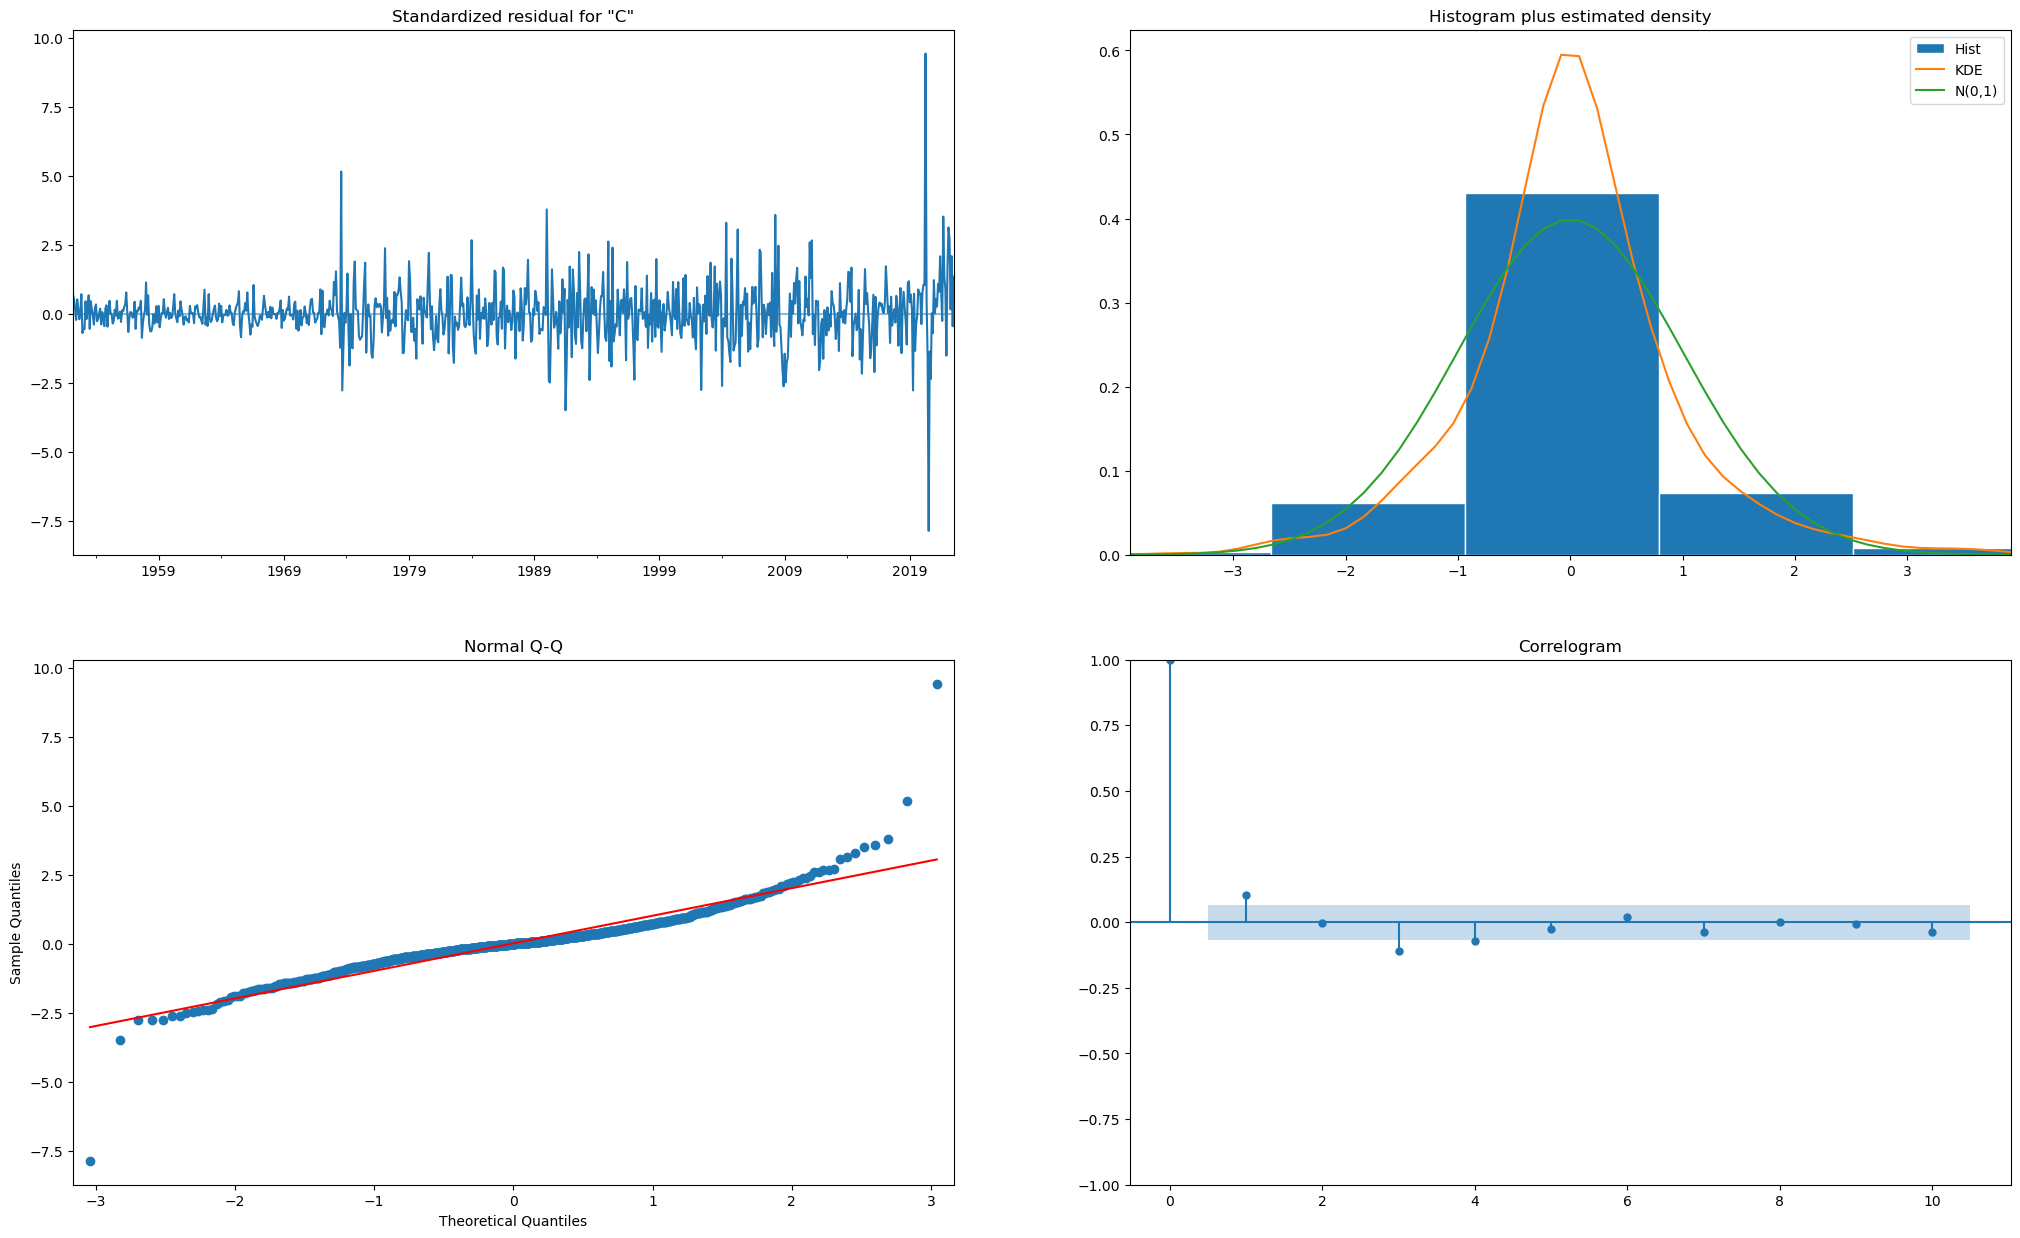

In [15]:
plt.rcParams['figure.figsize'] = (25,15)
ARIMA_CPI.plot_diagnostics()
plt.show()

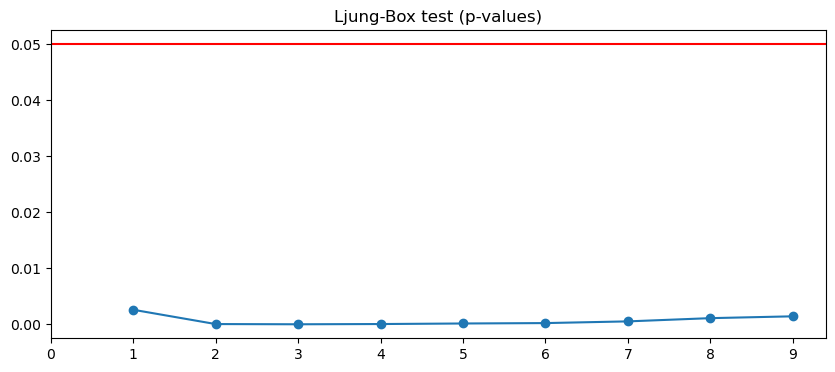

In [16]:
# Ljung-Box test for no serial correlation of standardized residuals
ljungbox = ARIMA_CPI.test_serial_correlation(
    method="ljungbox", df_adjust=True, lags=None
)

# plot Ljung-Box test p-values and 0.05 significance line
plt.rcParams['figure.figsize'] = (10,4)
plt.plot(ljungbox[0][1], marker = 'o')
plt.axhline(y=0.05,color = "r")
plt.xticks(range(len(ljungbox[0][1])))
plt.title("Ljung-Box test (p-values)")
plt.show()

**Comments about diagnostics**

Normal Q-Q: the distribution has fat tails

Correlogram: lags 1,4 and 9 are significant

Ljung-Box test: the residuals are not independent => Let's use data without log transforamtion

Model selection with raw data

In [17]:
mod_can_auto = auto_arima(
    df, 
    start_p=0,
    start_d=0,
    start_q=0,
    max_p=2,
    max_d=2,
    max_q=2,
    trace=True,
    with_intercept=False,
    return_valid_fits=True,
)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1748.566, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1591.704, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1471.557, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1453.915, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1452.051, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1556.713, Time=0.11 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1452.915, Time=0.34 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1453.125, Time=0.29 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1452.984, Time=0.56 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 2.065 seconds


Apply new parameters and fit

In [18]:
ARIMA_CPI = ARIMA(df, order=(2, 2, 1), trend="n").fit()
ARIMA_CPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    CPI   No. Observations:                  847
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -722.025
Date:                Sun, 18 Dec 2022   AIC                           1452.051
Time:                        22:24:53   BIC                           1471.008
Sample:                    01-01-1952   HQIC                          1459.314
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2436      0.033      7.309      0.000       0.178       0.309
ar.L2          0.0846      0.033      2.531      0.011       0.019       0.150
ma.L1         -0.8944      0.016    -55.457      0.000      -0.926      -0.863
sigma2         0.3230      0.006     56.967      0.000       0.312       0.334
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7417.95
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               4.89   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# New model diagnostics

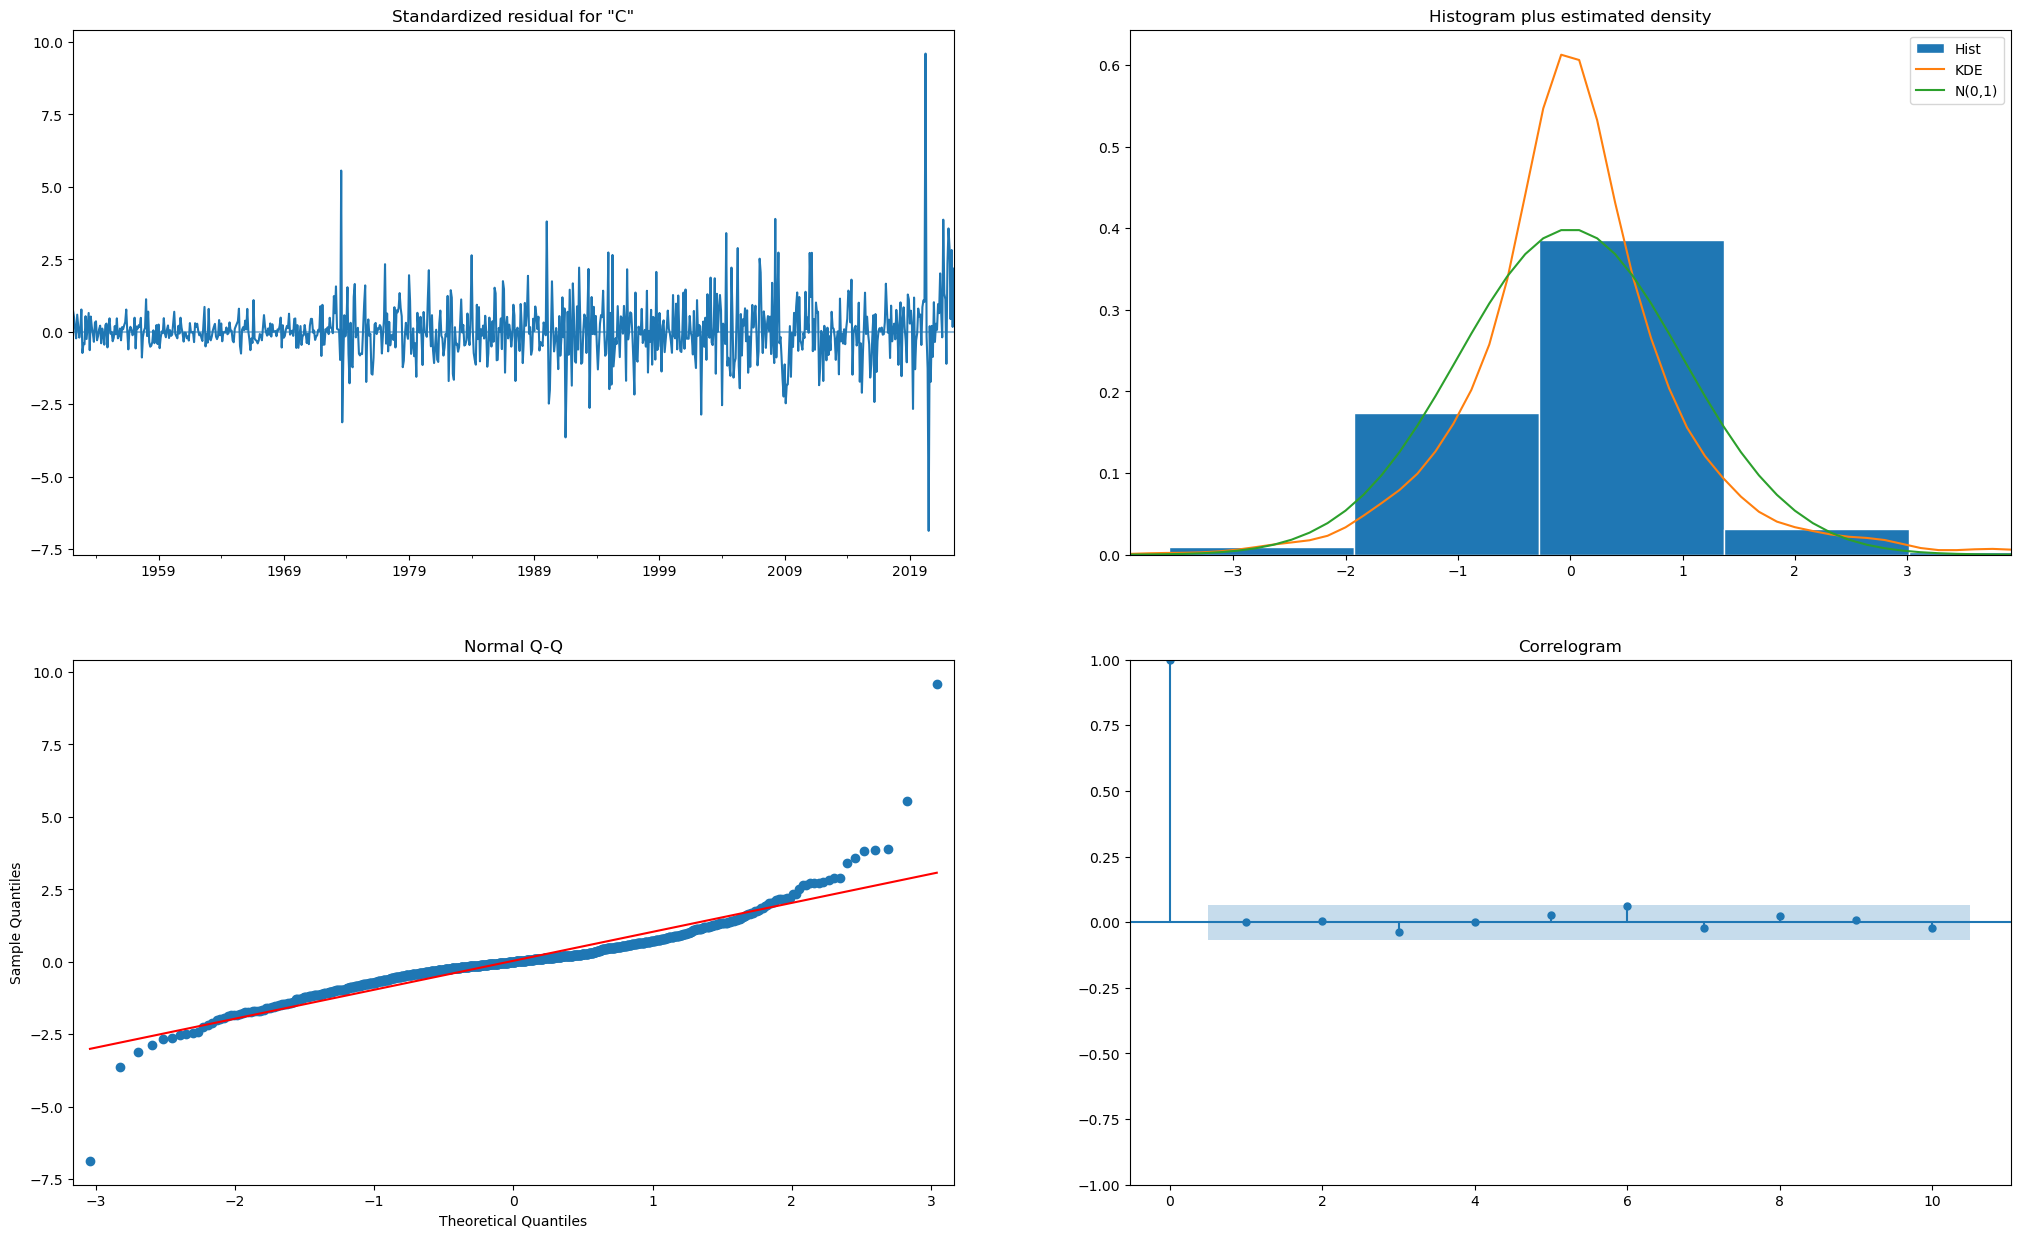

In [19]:
plt.rcParams['figure.figsize'] = (25,15)
ARIMA_CPI.plot_diagnostics()
plt.show()

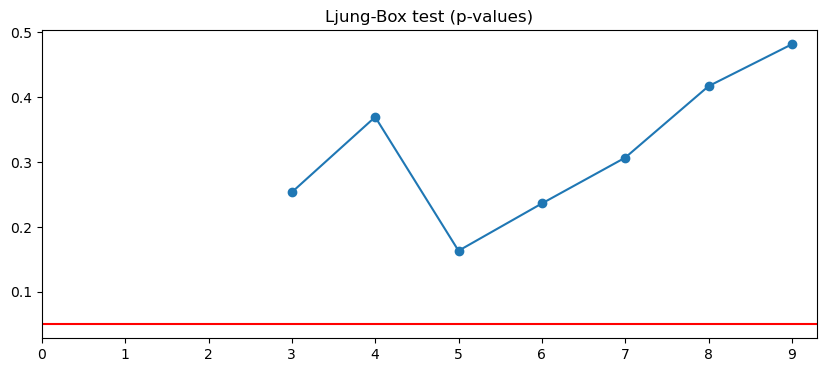

In [20]:
# Ljung-Box test for no serial correlation of standardized residuals
ljungbox = ARIMA_CPI.test_serial_correlation(
    method="ljungbox", df_adjust=True, lags=None
)

# plot Ljung-Box test p-values and 0.05 significance line
plt.rcParams['figure.figsize'] = (10,4)
plt.plot(ljungbox[0][1], marker = 'o')
plt.axhline(y=0.05,color = "r")
plt.xticks(range(len(ljungbox[0][1])))
plt.title("Ljung-Box test (p-values)")
plt.show()

QQ plot reflects that distribution of residuals is not normal but at least residuals are independent except for the first two lags.